# CASA0003 - Digital Visualisation 
## Assessment 1

### Data preparation 

In [1]:
# import the main libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

### Load files
Load [file ](https://www.kaggle.com/paultimothymooney/latitude-and-longitude-for-every-country-and-state) with lat and long info for countries to be used in the globe visualisation 


In [2]:
# read file
coords = pd.read_csv("Data/raw/world_country_and_usa_states_latitude_and_longitude_values.csv")
coords.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [3]:
coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         244 non-null    object 
 1   latitude             244 non-null    float64
 2   longitude            244 non-null    float64
 3   country              245 non-null    object 
 4   usa_state_code       52 non-null     object 
 5   usa_state_latitude   52 non-null     float64
 6   usa_state_longitude  52 non-null     float64
 7   usa_state            52 non-null     object 
dtypes: float64(4), object(4)
memory usage: 15.4+ KB


In [4]:
coords.columns

Index(['country_code', 'latitude', 'longitude', 'country', 'usa_state_code',
       'usa_state_latitude', 'usa_state_longitude', 'usa_state'],
      dtype='object')

In [5]:
#columns to be kept
keep = ['country_code', 'latitude', 'longitude', 'country']
#subset datafreme
coords = coords[keep]
coords.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [6]:
# create new column that will be used to merge with the trade data
coords["code country"] = coords["country_code"] + " " + coords["country"]
coords.head()

,country_code,latitude,longitude,country,code country
0,AD,42.546245,1.601554,Andorra,AD Andorra
1,AE,23.424076,53.847818,United Arab Emirates,AE United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan,AF Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda,AG Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla,AI Anguilla


In [7]:
coords[coords.country == "Ireland"]

,country_code,latitude,longitude,country,code country
99,IE,53.41291,-8.24389,Ireland,IE Ireland


In [8]:
#coords[coords['country'].str.startswith("U")]

### load trade data
The data was downloaded from the 
[Office for National Statistics ](https://www.ons.gov.uk/economy/nationalaccounts/balanceofpayments/datasets/uktradecountrybycommodityimports)

In [9]:
#read the data
df = pd.read_excel("Data/raw/Country by commodity Imports.xlsx", sheet_name="Country by Commodity Import", header=0)
df.head()

,COMMODITY,COUNTRY,DIRECTION,2018JAN,2018FEB,2018MAR,2018APR,2018MAY,2018JUN,2018JUL,...,2021MAR,2021APR,2021MAY,2021JUN,2021JUL,2021AUG,2021SEP,2021OCT,2021NOV,2021DEC
0,0 Food & live animals,AD Andorra,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.07,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0 Food & live animals,AE United Arab Emirates,IM Imports,0.71,0.71,8.59,1.43,0.85,0.93,0.79,...,5.34,1.52,1.17,1.32,1.54,1.76,1.33,1.03,1.38,1.74
2,0 Food & live animals,AF Afghanistan,IM Imports,0.06,0.00,0.00,0.00,0.02,0.12,0.00,...,0.10,0.12,0.02,0.00,0.03,0.01,0.00,0.00,0.10,0.15
3,0 Food & live animals,AG Antigua and Barbuda,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.02,0.00,0.04,0.00,0.00,0.05,0.00,0.00,0.00
4,0 Food & live animals,AI Anguilla,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00


In [10]:
df.shape

(29625, 51)

In [11]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29625 entries, 0 to 29624
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COMMODITY  29625 non-null  object 
 1   COUNTRY    29625 non-null  object 
 2   DIRECTION  29625 non-null  object 
 3   2018JAN    29500 non-null  float64
 4   2018FEB    29500 non-null  float64
 5   2018MAR    29500 non-null  float64
 6   2018APR    29500 non-null  float64
 7   2018MAY    29500 non-null  float64
 8   2018JUN    29500 non-null  float64
 9   2018JUL    29500 non-null  float64
 10  2018AUG    29500 non-null  float64
 11  2018SEP    29500 non-null  float64
 12  2018OCT    29500 non-null  float64
 13  2018NOV    29500 non-null  float64
 14  2018DEC    29500 non-null  float64
 15  2019JAN    29500 non-null  float64
 16  2019FEB    29500 non-null  float64
 17  2019MAR    29500 non-null  float64
 18  2019APR    29500 non-null  float64
 19  2019MAY    29500 non-null  float64
 20  2019JU

In [12]:
# print out columns
df.columns

Index(['COMMODITY', 'COUNTRY', 'DIRECTION', '2018JAN', '2018FEB', '2018MAR',
       '2018APR', '2018MAY', '2018JUN', '2018JUL', '2018AUG', '2018SEP',
       '2018OCT', '2018NOV', '2018DEC', '2019JAN', '2019FEB', '2019MAR',
       '2019APR', '2019MAY', '2019JUN', '2019JUL', '2019AUG', '2019SEP',
       '2019OCT', '2019NOV', '2019DEC', '2020JAN', '2020FEB', '2020MAR',
       '2020APR', '2020MAY', '2020JUN', '2020JUL', '2020AUG', '2020SEP',
       '2020OCT', '2020NOV', '2020DEC', '2021JAN', '2021FEB', '2021MAR',
       '2021APR', '2021MAY', '2021JUN', '2021JUL', '2021AUG', '2021SEP',
       '2021OCT', '2021NOV', '2021DEC'],
      dtype='object')

In [13]:
#create lists for the columns to be summed 

col_2018 = ['2018JAN', '2018FEB', '2018MAR', '2018APR', '2018MAY', '2018JUN', '2018JUL', '2018AUG', '2018SEP','2018OCT', '2018NOV', '2018DEC']
col_2019 = ['2019JAN', '2019FEB', '2019MAR','2019APR', '2019MAY', '2019JUN', '2019JUL', '2019AUG', '2019SEP','2019OCT', '2019NOV','2019DEC']
col_2020 = ['2020JAN', '2020FEB', '2020MAR','2020APR', '2020MAY', '2020JUN', '2020JUL', '2020AUG', '2020SEP','2020OCT', '2020NOV', '2020DEC']
col_2021 = ['2021JAN', '2021FEB', '2021MAR', '2021APR', '2021MAY', '2021JUN', '2021JUL', '2021AUG', '2021SEP','2021OCT', '2021NOV', '2021DEC']

In [14]:
# create sums over the months of each year
# df['e'] = df[col_list].sum(axis=1)

df['total2018'] = df[col_2018].sum(axis=1)
df['total2019'] = df[col_2019].sum(axis=1)
df['total2020'] = df[col_2020].sum(axis=1)
df['total2021'] = df[col_2021].sum(axis=1)
df.head()

,COMMODITY,COUNTRY,DIRECTION,2018JAN,2018FEB,2018MAR,2018APR,2018MAY,2018JUN,2018JUL,...,2021JUL,2021AUG,2021SEP,2021OCT,2021NOV,2021DEC,total2018,total2019,total2020,total2021
0,0 Food & live animals,AD Andorra,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14
1,0 Food & live animals,AE United Arab Emirates,IM Imports,0.71,0.71,8.59,1.43,0.85,0.93,0.79,...,1.54,1.76,1.33,1.03,1.38,1.74,17.71,22.75,22.63,21.55
2,0 Food & live animals,AF Afghanistan,IM Imports,0.06,0.00,0.00,0.00,0.02,0.12,0.00,...,0.03,0.01,0.00,0.00,0.10,0.15,0.31,0.38,0.62,0.88
3,0 Food & live animals,AG Antigua and Barbuda,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.10,0.08,0.11
4,0 Food & live animals,AI Anguilla,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03


In [15]:
# to avoid an error when merging the datasets check how US is written
df[df['COUNTRY'].str.startswith("US")]

,COMMODITY,COUNTRY,DIRECTION,2018JAN,2018FEB,2018MAR,2018APR,2018MAY,2018JUN,2018JUL,...,2021JUL,2021AUG,2021SEP,2021OCT,2021NOV,2021DEC,total2018,total2019,total2020,total2021
219,0 Food & live animals,US United States inc Puerto Rico,IM Imports,81.62,63.00,81.33,68.97,89.39,84.00,71.63,...,61.35,69.96,43.54,65.18,56.63,44.93,975.37,939.52,886.76,782.36
456,00 Live animals,US United States inc Puerto Rico,IM Imports,1.18,0.38,1.14,1.28,0.62,1.17,0.57,...,0.25,3.41,0.20,4.32,0.48,1.53,40.09,25.78,9.29,12.76
693,01 Meat & meat preparations,US United States inc Puerto Rico,IM Imports,0.36,0.78,0.75,0.97,0.50,0.35,0.51,...,0.47,0.30,0.29,0.41,1.98,2.90,7.49,6.12,6.22,9.50
930,02 Dairy products & eggs,US United States inc Puerto Rico,IM Imports,0.92,1.62,2.37,2.32,2.50,3.90,4.51,...,1.13,1.44,1.44,1.05,1.03,1.01,22.45,20.01,23.71,22.87
1167,03 Fish & shellfish,US United States inc Puerto Rico,IM Imports,6.82,4.20,5.02,5.51,4.30,4.22,5.40,...,2.14,1.65,4.77,6.72,5.67,3.02,66.96,70.79,74.27,46.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28659,8OC Other miscellaneous manufactures (consumer),US United States inc Puerto Rico,IM Imports,122.57,114.69,123.45,113.11,127.93,110.76,130.71,...,135.84,157.55,125.25,144.54,132.81,127.84,1526.46,1580.18,1369.05,1564.67
28896,8OI Other miscellaneous manufactures (intermed...,US United States inc Puerto Rico,IM Imports,34.74,29.94,32.87,33.24,35.67,41.38,34.02,...,26.58,29.53,25.70,26.94,30.56,24.18,433.09,495.14,398.23,326.76
29133,8OK Other miscellaneous manufactures (capital),US United States inc Puerto Rico,IM Imports,8.92,8.11,10.38,8.56,9.80,11.35,11.72,...,10.72,10.52,7.14,8.35,8.88,7.17,112.47,119.61,96.93,101.14
29370,9 Unspecified goods,US United States inc Puerto Rico,IM Imports,23.36,21.96,326.20,495.41,141.30,18.48,21.82,...,234.24,290.80,43.14,18.55,22.92,22.31,1649.93,4224.59,1683.61,2625.40


In [16]:
# remove the 'inc Puerto Rico' (for the merge later)
# df['Name'] = df['Name'].replace(to_replace='Jane', value='Joan')
df["COUNTRY"] = df["COUNTRY"].replace(to_replace= 'US United States inc Puerto Rico', value = "US United States")

In [17]:
#check it worked
df[df['COUNTRY'].str.startswith("US")]

,COMMODITY,COUNTRY,DIRECTION,2018JAN,2018FEB,2018MAR,2018APR,2018MAY,2018JUN,2018JUL,...,2021JUL,2021AUG,2021SEP,2021OCT,2021NOV,2021DEC,total2018,total2019,total2020,total2021
219,0 Food & live animals,US United States,IM Imports,81.62,63.00,81.33,68.97,89.39,84.00,71.63,...,61.35,69.96,43.54,65.18,56.63,44.93,975.37,939.52,886.76,782.36
456,00 Live animals,US United States,IM Imports,1.18,0.38,1.14,1.28,0.62,1.17,0.57,...,0.25,3.41,0.20,4.32,0.48,1.53,40.09,25.78,9.29,12.76
693,01 Meat & meat preparations,US United States,IM Imports,0.36,0.78,0.75,0.97,0.50,0.35,0.51,...,0.47,0.30,0.29,0.41,1.98,2.90,7.49,6.12,6.22,9.50
930,02 Dairy products & eggs,US United States,IM Imports,0.92,1.62,2.37,2.32,2.50,3.90,4.51,...,1.13,1.44,1.44,1.05,1.03,1.01,22.45,20.01,23.71,22.87
1167,03 Fish & shellfish,US United States,IM Imports,6.82,4.20,5.02,5.51,4.30,4.22,5.40,...,2.14,1.65,4.77,6.72,5.67,3.02,66.96,70.79,74.27,46.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28659,8OC Other miscellaneous manufactures (consumer),US United States,IM Imports,122.57,114.69,123.45,113.11,127.93,110.76,130.71,...,135.84,157.55,125.25,144.54,132.81,127.84,1526.46,1580.18,1369.05,1564.67
28896,8OI Other miscellaneous manufactures (intermed...,US United States,IM Imports,34.74,29.94,32.87,33.24,35.67,41.38,34.02,...,26.58,29.53,25.70,26.94,30.56,24.18,433.09,495.14,398.23,326.76
29133,8OK Other miscellaneous manufactures (capital),US United States,IM Imports,8.92,8.11,10.38,8.56,9.80,11.35,11.72,...,10.72,10.52,7.14,8.35,8.88,7.17,112.47,119.61,96.93,101.14
29370,9 Unspecified goods,US United States,IM Imports,23.36,21.96,326.20,495.41,141.30,18.48,21.82,...,234.24,290.80,43.14,18.55,22.92,22.31,1649.93,4224.59,1683.61,2625.40


In [18]:
# subset dataframe to keep only the Food Imports. 
df0 = df[df["COMMODITY"] == "0 Food & live animals"]

df0.head()

,COMMODITY,COUNTRY,DIRECTION,2018JAN,2018FEB,2018MAR,2018APR,2018MAY,2018JUN,2018JUL,...,2021JUL,2021AUG,2021SEP,2021OCT,2021NOV,2021DEC,total2018,total2019,total2020,total2021
0,0 Food & live animals,AD Andorra,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14
1,0 Food & live animals,AE United Arab Emirates,IM Imports,0.71,0.71,8.59,1.43,0.85,0.93,0.79,...,1.54,1.76,1.33,1.03,1.38,1.74,17.71,22.75,22.63,21.55
2,0 Food & live animals,AF Afghanistan,IM Imports,0.06,0.00,0.00,0.00,0.02,0.12,0.00,...,0.03,0.01,0.00,0.00,0.10,0.15,0.31,0.38,0.62,0.88
3,0 Food & live animals,AG Antigua and Barbuda,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.10,0.08,0.11
4,0 Food & live animals,AI Anguilla,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03


In [19]:
# keep just the food 00series 
#s.loc[s.str.startswith('a', na=False)]

df00s = df.loc[(df["COMMODITY"].str.startswith("0")) & (df["COMMODITY"] != "0 Food & live animals")]
df00s.shape

(2370, 55)

In [20]:
df00s.head()

,COMMODITY,COUNTRY,DIRECTION,2018JAN,2018FEB,2018MAR,2018APR,2018MAY,2018JUN,2018JUL,...,2021JUL,2021AUG,2021SEP,2021OCT,2021NOV,2021DEC,total2018,total2019,total2020,total2021
237,00 Live animals,AD Andorra,IM Imports,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00
238,00 Live animals,AE United Arab Emirates,IM Imports,0.0,0.24,7.97,0.46,0.07,0.07,0.02,...,0.01,0.0,0.0,0.01,0.01,0.0,8.95,11.3,7.18,3.68
239,00 Live animals,AF Afghanistan,IM Imports,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00
240,00 Live animals,AG Antigua and Barbuda,IM Imports,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.01,0.00
241,00 Live animals,AI Anguilla,IM Imports,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00


In [21]:
#df = df[(df.T != 0).any()]


In [22]:
# group by country and commodity 

countries = df00s.groupby(["COUNTRY", "COMMODITY"])["total2018", "total2019", "total2020", "total2021"].sum().reset_index()
countries.shape

/tmp/ipykernel_63/3977667923.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  countries = df00s.groupby(["COUNTRY", "COMMODITY"])["total2018", "total2019", "total2020", "total2021"].sum().reset_index()


(2370, 6)

In [23]:
countries.head(30)

,COUNTRY,COMMODITY,total2018,total2019,total2020,total2021
0,AD Andorra,00 Live animals,0.00,0.00,0.00,0.00
1,AD Andorra,01 Meat & meat preparations,0.00,0.00,0.00,0.00
2,AD Andorra,02 Dairy products & eggs,0.00,0.00,0.00,0.00
3,AD Andorra,03 Fish & shellfish,0.00,0.00,0.00,0.00
4,AD Andorra,04 Cereals,0.00,0.00,0.00,0.00
5,AD Andorra,05 Vegetables & fruit,0.00,0.00,0.00,0.07
6,AD Andorra,06 Sugar,0.00,0.00,0.00,0.00
7,AD Andorra,"07 Coffee, tea, cocoa etc",0.00,0.00,0.00,0.07
8,AD Andorra,08 Animal feeding stuffs,0.00,0.00,0.00,0.00
9,AD Andorra,09 Miscellaneous foods,0.00,0.00,0.00,0.00


In [24]:
# print out the aggregated data
countries.loc[countries["COUNTRY"]=="W1 Whole world"]

,COUNTRY,COMMODITY,total2018,total2019,total2020,total2021
2290,W1 Whole world,00 Live animals,538.0,529.0,521.0,447.0
2291,W1 Whole world,01 Meat & meat preparations,6747.0,6656.0,6319.0,5740.0
2292,W1 Whole world,02 Dairy products & eggs,3387.0,3320.0,3246.0,2908.0
2293,W1 Whole world,03 Fish & shellfish,3225.0,3502.0,3314.0,3242.0
2294,W1 Whole world,04 Cereals,4077.0,4259.0,4489.0,4217.0
2295,W1 Whole world,05 Vegetables & fruit,11092.0,11589.0,11585.0,10462.0
2296,W1 Whole world,06 Sugar,1174.0,1202.0,1131.0,1185.0
2297,W1 Whole world,"07 Coffee, tea, cocoa etc",3730.0,3819.0,3964.0,3519.0
2298,W1 Whole world,08 Animal feeding stuffs,2359.0,2453.0,2565.0,2644.0
2299,W1 Whole world,09 Miscellaneous foods,3249.0,3458.0,3686.0,3179.0


In [25]:
# drop the aggregated data
countries.drop(countries.loc[countries["COUNTRY"]=="W1 Whole world"].index , axis= 0, inplace=True)

In [26]:
# print out the aggregated data
countries.loc[countries["COUNTRY"]=="B5 Total EU(28)"]

,COUNTRY,COMMODITY,total2018,total2019,total2020,total2021
150,B5 Total EU(28),00 Live animals,478.0,479.0,497.0,419.0
151,B5 Total EU(28),01 Meat & meat preparations,5512.0,5488.0,5246.0,4735.0
152,B5 Total EU(28),02 Dairy products & eggs,3343.0,3276.0,3198.0,2851.0
153,B5 Total EU(28),03 Fish & shellfish,1083.0,1213.0,1167.0,850.0
154,B5 Total EU(28),04 Cereals,3264.0,3299.0,3506.0,3179.0
155,B5 Total EU(28),05 Vegetables & fruit,6916.0,7364.0,7324.0,6056.0
156,B5 Total EU(28),06 Sugar,799.0,804.0,701.0,705.0
157,B5 Total EU(28),"07 Coffee, tea, cocoa etc",2530.0,2647.0,2774.0,2251.0
158,B5 Total EU(28),08 Animal feeding stuffs,1306.0,1372.0,1549.0,1428.0
159,B5 Total EU(28),09 Miscellaneous foods,2633.0,2779.0,2971.0,2463.0


In [27]:
# drop the aggregated data
countries.drop(countries.loc[countries["COUNTRY"]=="B5 Total EU(28)"].index , axis= 0, inplace=True)

In [28]:
# print out the aggregated data
countries.loc[countries["COUNTRY"]=="D5 Extra EU 28 (Rest of World)"]

,COUNTRY,COMMODITY,total2018,total2019,total2020,total2021
550,D5 Extra EU 28 (Rest of World),00 Live animals,60.0,50.0,24.0,28.0
551,D5 Extra EU 28 (Rest of World),01 Meat & meat preparations,1235.0,1168.0,1073.0,1005.0
552,D5 Extra EU 28 (Rest of World),02 Dairy products & eggs,44.0,44.0,48.0,57.0
553,D5 Extra EU 28 (Rest of World),03 Fish & shellfish,2142.0,2289.0,2147.0,2392.0
554,D5 Extra EU 28 (Rest of World),04 Cereals,813.0,960.0,983.0,1038.0
555,D5 Extra EU 28 (Rest of World),05 Vegetables & fruit,4176.0,4225.0,4261.0,4406.0
556,D5 Extra EU 28 (Rest of World),06 Sugar,375.0,398.0,430.0,480.0
557,D5 Extra EU 28 (Rest of World),"07 Coffee, tea, cocoa etc",1200.0,1172.0,1190.0,1268.0
558,D5 Extra EU 28 (Rest of World),08 Animal feeding stuffs,1053.0,1081.0,1016.0,1216.0
559,D5 Extra EU 28 (Rest of World),09 Miscellaneous foods,616.0,679.0,715.0,716.0


In [29]:
countries.drop(countries.loc[countries["COUNTRY"]=="D5 Extra EU 28 (Rest of World)"].index , axis= 0, inplace=True)

In [30]:
#countries = countries.loc[(countries !=0).any(axis=1)]
#countries =  countries[(countries.T !=0).any()]
countries.shape

(2340, 6)

### add the lat and long info by merging the datasets

In [395]:
# merge the datasets using the country code + name columns of each dataset
df_comm = pd.merge(countries, coords, left_on = "COUNTRY", right_on="code country", how= "left")
df_comm

,COUNTRY,COMMODITY,total2018,total2019,total2020,total2021,country_code,latitude,longitude,country,code country
0,AD Andorra,00 Live animals,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,Andorra,AD Andorra
1,AD Andorra,01 Meat & meat preparations,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,Andorra,AD Andorra
2,AD Andorra,02 Dairy products & eggs,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,Andorra,AD Andorra
3,AD Andorra,03 Fish & shellfish,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,Andorra,AD Andorra
4,AD Andorra,04 Cereals,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,Andorra,AD Andorra
...,...,...,...,...,...,...,...,...,...,...,...
2335,ZW Zimbabwe,05 Vegetables & fruit,8.51,5.97,3.89,3.44,ZW,-19.015438,29.154857,Zimbabwe,ZW Zimbabwe
2336,ZW Zimbabwe,06 Sugar,0.00,0.00,0.00,0.00,ZW,-19.015438,29.154857,Zimbabwe,ZW Zimbabwe
2337,ZW Zimbabwe,"07 Coffee, tea, cocoa etc",0.81,2.89,1.96,1.40,ZW,-19.015438,29.154857,Zimbabwe,ZW Zimbabwe
2338,ZW Zimbabwe,08 Animal feeding stuffs,0.00,0.00,0.00,0.00,ZW,-19.015438,29.154857,Zimbabwe,ZW Zimbabwe


In [396]:
#drop unecessary column
df_comm = df_comm.drop(["COUNTRY"],axis=1)
df_comm.head()

,COMMODITY,total2018,total2019,total2020,total2021,country_code,latitude,longitude,country,code country
0,00 Live animals,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,Andorra,AD Andorra
1,01 Meat & meat preparations,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,Andorra,AD Andorra
2,02 Dairy products & eggs,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,Andorra,AD Andorra
3,03 Fish & shellfish,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,Andorra,AD Andorra
4,04 Cereals,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,Andorra,AD Andorra


In [397]:
#rename column
df_comm= df_comm.rename( columns={"COMMODITY":"commodity"})
#and set the country as index 
df_comm= df_comm.set_index("country")
df_comm.head()

,commodity,total2018,total2019,total2020,total2021,country_code,latitude,longitude,code country
country,,,,,,,,,
Andorra,00 Live animals,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,AD Andorra
Andorra,01 Meat & meat preparations,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,AD Andorra
Andorra,02 Dairy products & eggs,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,AD Andorra
Andorra,03 Fish & shellfish,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,AD Andorra
Andorra,04 Cereals,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,AD Andorra


In [398]:
#df_comm[df_comm["total2019"]==0]

In [399]:
df_comm = df_comm.dropna()

In [400]:
df_comm.shape

(2010, 9)

--------------------

In [401]:
#dropped =  df_comm[(df_comm["total2018"]<50) & (df_comm["total2019"]<50) & (df_comm["total2020"]<50) & (df_comm["total2021"]<50)]
#dropped = dropped.groupby(["country"])["total2018", "total2019", "total2020", "total2021"].sum().reset_index()
#dropped.head(5)

In [402]:
#dropped[dropped["country"]=="China"]

In [403]:
# for ease of visualisation we will drop the countries with very small import values 
#df_comm = df_comm[(df_comm["total2018"]>=50) & (df_comm["total2019"]>=50) & (df_comm["total2020"]>=50) & (df_comm["total2021"]>=50)]
#df_comm.shape

In [404]:
df_comm.head(30)

,commodity,total2018,total2019,total2020,total2021,country_code,latitude,longitude,code country
country,,,,,,,,,
Andorra,00 Live animals,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,AD Andorra
Andorra,01 Meat & meat preparations,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,AD Andorra
Andorra,02 Dairy products & eggs,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,AD Andorra
Andorra,03 Fish & shellfish,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,AD Andorra
Andorra,04 Cereals,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,AD Andorra
Andorra,05 Vegetables & fruit,0.00,0.00,0.00,0.07,AD,42.546245,1.601554,AD Andorra
Andorra,06 Sugar,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,AD Andorra
Andorra,"07 Coffee, tea, cocoa etc",0.00,0.00,0.00,0.07,AD,42.546245,1.601554,AD Andorra
Andorra,08 Animal feeding stuffs,0.00,0.00,0.00,0.00,AD,42.546245,1.601554,AD Andorra


In [299]:
#export and save the results
#df_comm.to_csv("Data/countrybycommodity.csv")

### group by commodity

In [300]:
df_com2 = df_comm.groupby(["commodity", "country"])["total2018", "total2019", "total2020", "total2021"].sum().reset_index()
df_com2.head(30)

/tmp/ipykernel_63/302523992.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_com2 = df_comm.groupby(["commodity", "country"])["total2018", "total2019", "total2020", "total2021"].sum().reset_index()


,commodity,country,total2018,total2019,total2020,total2021
0,00 Live animals,Afghanistan,0.00,0.00,0.00,0.00
1,00 Live animals,Albania,0.00,0.00,0.00,0.00
2,00 Live animals,Algeria,0.00,0.00,0.00,0.00
3,00 Live animals,American Samoa,0.00,0.00,0.00,0.00
4,00 Live animals,Andorra,0.00,0.00,0.00,0.00
5,00 Live animals,Angola,0.00,0.00,0.01,0.00
6,00 Live animals,Anguilla,0.00,0.00,0.00,0.00
7,00 Live animals,Antarctica,0.00,0.00,0.00,0.00
8,00 Live animals,Antigua and Barbuda,0.00,0.00,0.01,0.00
9,00 Live animals,Argentina,2.78,2.23,0.85,1.90


## country totals

In [301]:
# group by country, sum the values and sort 
countries1 = countries.groupby(["COUNTRY"]).sum().reset_index().sort_values("total2021", ascending=False)
countries1.tail(100)


,COUNTRY,total2018,total2019,total2020,total2021
134,ML Mali,0.62,0.41,0.40,0.36
173,QA Qatar,0.29,0.15,0.04,0.31
132,MH Marshall Islands,0.89,0.64,0.37,0.29
67,FJ Fiji,3.93,16.57,25.64,0.28
115,KY Cayman Islands,0.00,0.00,0.00,0.28
...,...,...,...,...,...
102,JE Jersey,0.00,0.00,0.00,0.00
107,KG Kyrgyzstan,0.02,0.01,0.00,0.00
199,TD Chad,0.00,0.00,0.00,0.00
200,TF French Southern Territories,0.00,0.00,0.00,0.00


Text(0, 0.5, '')

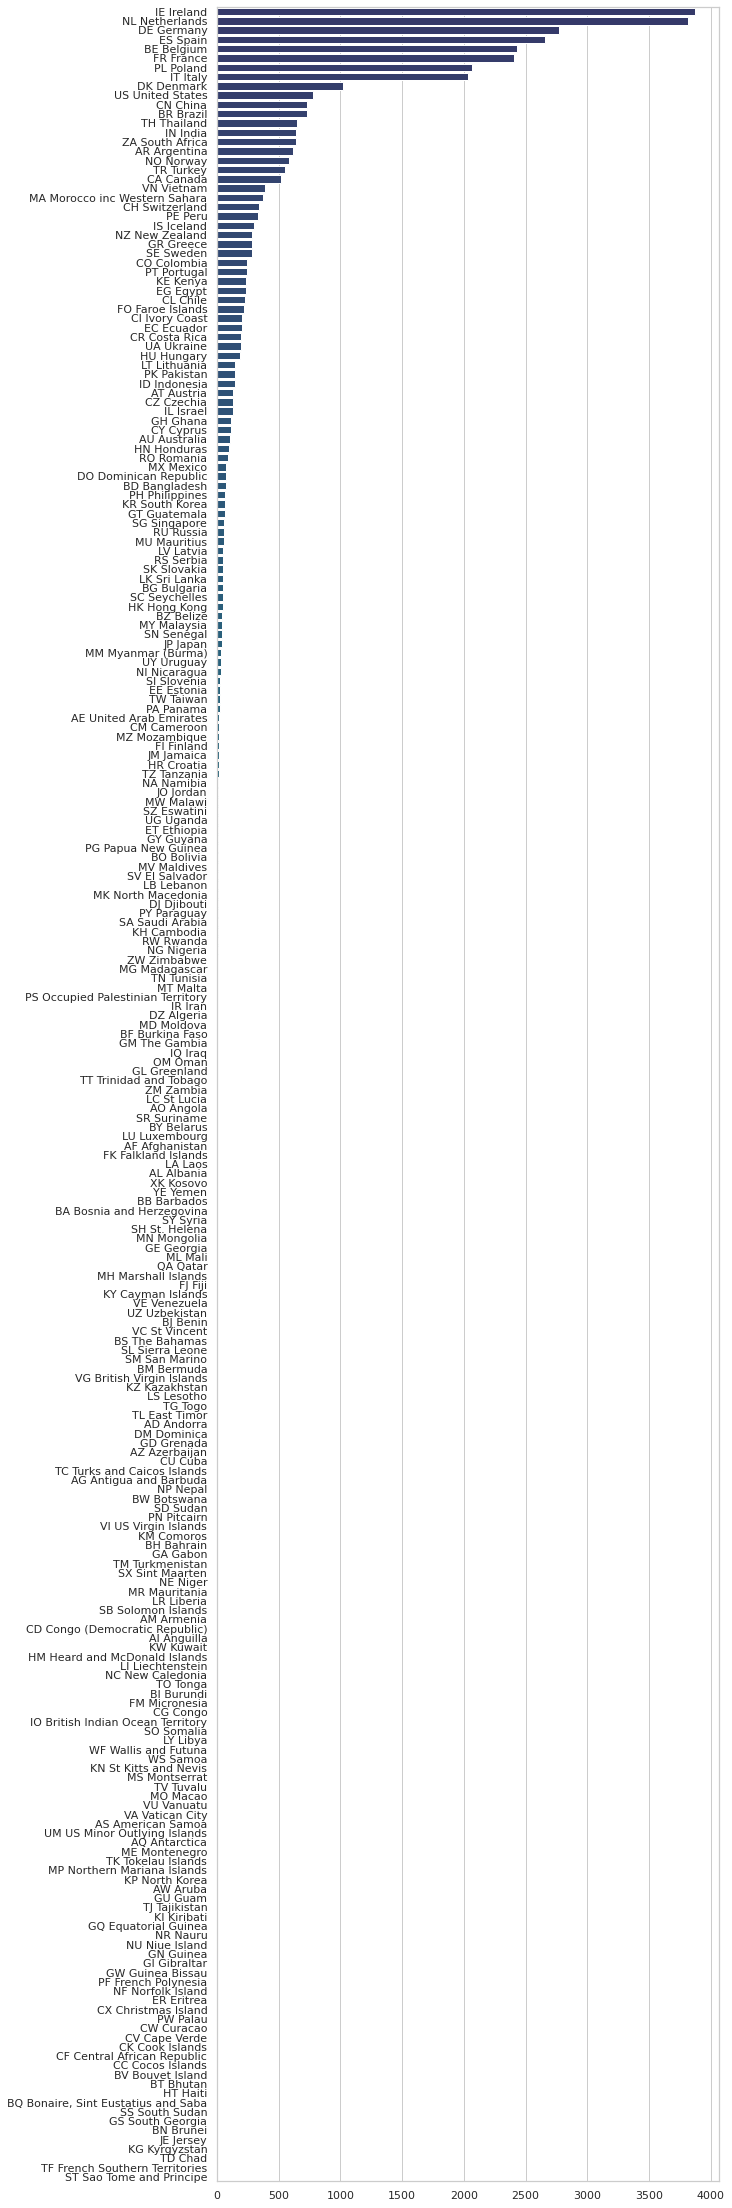

In [302]:
# create bar chart to visualise the data

sns.set(style="whitegrid")
#sns.set_theme(style='darkgrid')
plt.figure(figsize=(9, 40))

ax = sns.barplot( x="total2021",
                  y="COUNTRY", 
                 #hue="room_type",
                  data=countries1,
                  order = countries1["COUNTRY"],
                  palette="crest_r")

plt.xlabel("UK imporst (£'s million)", size=14)
plt.xlabel(None)
plt.ylabel(None)

#plt.savefig("Barplot.png", bbox_inches = 'tight')



### merge with lang lot data

In [303]:
countries1 = pd.merge(countries1, coords, left_on = "COUNTRY", right_on="code country", how= "left")

In [304]:
countries1.head()

,COUNTRY,total2018,total2019,total2020,total2021,country_code,latitude,longitude,country,code country
0,IE Ireland,4526.46,4491.43,4493.01,3872.34,IE,53.412910,-8.243890,Ireland,IE Ireland
1,NL Netherlands,4777.85,4877.34,4551.89,3816.09,NL,52.132633,5.291266,Netherlands,NL Netherlands
2,DE Germany,3822.57,4153.08,4127.50,2772.28,DE,51.165691,10.451526,Germany,DE Germany
3,ES Spain,2761.35,2981.66,3074.73,2659.40,ES,40.463667,-3.749220,Spain,ES Spain
4,BE Belgium,2085.93,2221.84,2167.83,2430.49,BE,50.503887,4.469936,Belgium,BE Belgium


In [305]:
#drop unecessary column
countries1 = countries1.drop(["COUNTRY"],axis=1)
countries1.head()

,total2018,total2019,total2020,total2021,country_code,latitude,longitude,country,code country
0,4526.46,4491.43,4493.01,3872.34,IE,53.412910,-8.243890,Ireland,IE Ireland
1,4777.85,4877.34,4551.89,3816.09,NL,52.132633,5.291266,Netherlands,NL Netherlands
2,3822.57,4153.08,4127.50,2772.28,DE,51.165691,10.451526,Germany,DE Germany
3,2761.35,2981.66,3074.73,2659.40,ES,40.463667,-3.749220,Spain,ES Spain
4,2085.93,2221.84,2167.83,2430.49,BE,50.503887,4.469936,Belgium,BE Belgium


In [306]:
countriestotal= countries1.set_index("country")
countriestotal.head()

,total2018,total2019,total2020,total2021,country_code,latitude,longitude,code country
country,,,,,,,,
Ireland,4526.46,4491.43,4493.01,3872.34,IE,53.412910,-8.243890,IE Ireland
Netherlands,4777.85,4877.34,4551.89,3816.09,NL,52.132633,5.291266,NL Netherlands
Germany,3822.57,4153.08,4127.50,2772.28,DE,51.165691,10.451526,DE Germany
Spain,2761.35,2981.66,3074.73,2659.40,ES,40.463667,-3.749220,ES Spain
Belgium,2085.93,2221.84,2167.83,2430.49,BE,50.503887,4.469936,BE Belgium


In [307]:
#countriestotal[countriestotal["total2019"]==0]

In [308]:
countriestotal = countriestotal.dropna()

In [309]:
#countriestotal = countriestotal[(countriestotal["total2018"]>=50) & (countriestotal["total2019"]>=50) & (countriestotal["total2020"]>=50) & (countriestotal["total2021"]>=50)]


In [310]:
countries50 = countriestotal[:50]
countries20 = countriestotal[:20]

In [311]:
top50= countries50.index.values.tolist()
type(top50)
top20 = countries20.index.values.tolist()
type(top20)

list

In [312]:
countriestotal.shape

(201, 8)

In [313]:
#export and save the results
countries50.to_csv("Data/countries50.csv")

# Data for stacked area chart with dropdown
prepare the data in the right format

In [314]:
df_comm.reset_index(inplace=True)
df_comm.head()

,country,commodity,total2018,total2019,total2020,total2021,country_code,latitude,longitude,code country
0,Andorra,00 Live animals,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,AD Andorra
1,Andorra,01 Meat & meat preparations,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,AD Andorra
2,Andorra,02 Dairy products & eggs,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,AD Andorra
3,Andorra,03 Fish & shellfish,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,AD Andorra
4,Andorra,04 Cereals,0.0,0.0,0.0,0.0,AD,42.546245,1.601554,AD Andorra


In [315]:
df_comm[df_comm["country"]=="China"]

,country,commodity,total2018,total2019,total2020,total2021,country_code,latitude,longitude,code country
390,China,00 Live animals,0.01,0.01,0.01,0.03,CN,35.86166,104.195397,CN China
391,China,01 Meat & meat preparations,26.50,31.61,27.64,28.65,CN,35.86166,104.195397,CN China
392,China,02 Dairy products & eggs,0.02,0.00,0.02,0.16,CN,35.86166,104.195397,CN China
393,China,03 Fish & shellfish,211.17,287.84,260.65,194.23,CN,35.86166,104.195397,CN China
394,China,04 Cereals,23.20,26.97,25.25,30.23,CN,35.86166,104.195397,CN China
395,China,05 Vegetables & fruit,143.60,157.44,151.58,147.00,CN,35.86166,104.195397,CN China
396,China,06 Sugar,53.93,55.62,51.82,57.11,CN,35.86166,104.195397,CN China
397,China,"07 Coffee, tea, cocoa etc",47.07,49.04,59.49,60.41,CN,35.86166,104.195397,CN China
398,China,08 Animal feeding stuffs,78.96,90.98,85.44,98.11,CN,35.86166,104.195397,CN China
399,China,09 Miscellaneous foods,76.54,95.76,108.69,116.19,CN,35.86166,104.195397,CN China


In [316]:
# convert it to a wide format
wideC = pd.melt(df_comm, id_vars=["country","commodity"], value_vars=['total2018',"total2019","total2020","total2021"],

        var_name='year', value_name='imports')

wideC.head(10)

,country,commodity,year,imports
0,Andorra,00 Live animals,total2018,0.0
1,Andorra,01 Meat & meat preparations,total2018,0.0
2,Andorra,02 Dairy products & eggs,total2018,0.0
3,Andorra,03 Fish & shellfish,total2018,0.0
4,Andorra,04 Cereals,total2018,0.0
5,Andorra,05 Vegetables & fruit,total2018,0.0
6,Andorra,06 Sugar,total2018,0.0
7,Andorra,"07 Coffee, tea, cocoa etc",total2018,0.0
8,Andorra,08 Animal feeding stuffs,total2018,0.0
9,Andorra,09 Miscellaneous foods,total2018,0.0


In [317]:
#remove the "total" from the year columns
wideC["year"]= wideC["year"].str.replace("total","")
wideC.head()
#wideC.info()

,country,commodity,year,imports
0,Andorra,00 Live animals,2018,0.0
1,Andorra,01 Meat & meat preparations,2018,0.0
2,Andorra,02 Dairy products & eggs,2018,0.0
3,Andorra,03 Fish & shellfish,2018,0.0
4,Andorra,04 Cereals,2018,0.0


In [326]:
# pivot table 
# df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

wideD = wideC.pivot(index=["country", "year"],columns='commodity', values='imports').fillna(0)
wideD.head(30)

commodity            00 Live animals  01 Meat & meat preparations  \
country        year                                                 
Afghanistan    2018             0.00                          0.0   
               2019             0.00                          0.0   
               2020             0.00                          0.0   
               2021             0.00                          0.0   
Albania        2018             0.00                          0.0   
               2019             0.00                          0.0   
               2020             0.00                          0.0   
               2021             0.00                          0.0   
Algeria        2018             0.00                          0.0   
               2019             0.00                          0.0   
               2020             0.00                          0.0   
               2021             0.00                          0.0   
American Samoa 2018             0.00                          0.0   
               2019             0.00                          0.0   
               2020             0.00                          0.0   
               2021             0.00                          0.0   
Andorra        2018             0.00                          0.0   
               2019             0.00                          0.0   
               2020             0.00                          0.0   
               2021             0.00                          0.0   
Angola         2018             0.00                          0.0   
               2019             0.00                          0.0   
               2020             0.01                          0.0   
               2021             0.00                          0.0   
Anguilla       2018             0.00                          0.0   
               2019             0.00                          0.0   
               2020             0.00                          0.0   
               2021             0.00                          0.0   
Antarctica     2018             0.00                          0.0   
               2019             0.00                          0.0   

commodity            02 Dairy products & eggs  03 Fish & shellfish  \
country        year                                                  
Afghanistan    2018                       0.0                 0.00   
               2019                       0.0                 0.00   
               2020                       0.0                 0.00   
               2021                       0.0                 0.00   
Albania        2018                       0.0                 0.00   
               2019                       0.0                 0.00   
               2020                       0.0                 0.00   
               2021                       0.0                 0.00   
Algeria        2018                       0.0                 0.00   
               2019                       0.0                 0.00   
               2020                       0.0                 0.00   
               2021                       0.0                 0.00   
American Samoa 2018                       0.0                 0.00   
               2019                       0.0                 0.00   
               2020                       0.0                 0.00   
               2021                       0.0                 0.00   
Andorra        2018                       0.0                 0.00   
               2019                       0.0                 0.00   
               2020                       0.0                 0.00   
               2021                       0.0                 0.00   
Angola         2018                       0.0                 0.13   
               2019                       0.0                 0.12   
               2020                       0.0                 0.05   
               2021                      

In [327]:
wideD.columns

Index(['00 Live animals', '01 Meat & meat preparations',
       '02 Dairy products & eggs', '03 Fish & shellfish', '04 Cereals',
       '05 Vegetables & fruit', '06 Sugar', '07 Coffee, tea, cocoa etc',
       '08 Animal feeding stuffs', '09 Miscellaneous foods'],
      dtype='object', name='commodity')

In [328]:
#rename the column names 
wideD.rename( columns={"00 Live animals":"Live animals", 
                              '01 Meat & meat preparations': "Meat",
                              '02 Dairy products & eggs': "Dairy and eggs",
                              '03 Fish & shellfish': "Fish and shellfish", 
                              '04 Cereals': "Cereals",
                              '05 Vegetables & fruit': "Vegetables and fruit", 
                              '06 Sugar': "Sugar", 
                              '07 Coffee, tea, cocoa etc': "Coffee tea cocoa etc",
                              '08 Animal feeding stuffs': "Animal feeding", 
                              '09 Miscellaneous foods': "Miscellaneous foods"
                             }, inplace=True)

In [329]:
wideD.shape

(804, 10)

In [332]:
wideD.head()

commodity         Live animals  Meat  Dairy and eggs  Fish and shellfish  \
country     year                                                           
Afghanistan 2018           0.0   0.0             0.0                 0.0   
            2019           0.0   0.0             0.0                 0.0   
            2020           0.0   0.0             0.0                 0.0   
            2021           0.0   0.0             0.0                 0.0   
Albania     2018           0.0   0.0             0.0                 0.0   

commodity         Cereals  Vegetables and fruit  Sugar  Coffee tea cocoa etc  \
country     year                                                               
Afghanistan 2018     0.16                  0.15   0.00                  0.00   
            2019     0.00                  0.37   0.00                  0.01   
            2020     0.00                  0.54   0.00                  0.08   
            2021     0.00                  0.73   0.02                  0.13   
Albania     2018     0.32                  0.03   0.00                  0.05   

commodity         Animal feeding  Miscellaneous foods  
country     year                                       
Afghanistan 2018             0.0                  0.0  
            2019             0.0                  0.0  
            2020             0.0                  0.0  
            2021             0.0                  0.0  
Albania     2018             0.0                  0.0

In [333]:
wideD.reset_index(inplace=True)
wideD.head()

commodity,country,year,Live animals,Meat,Dairy and eggs,Fish and shellfish,Cereals,Vegetables and fruit,Sugar,Coffee tea cocoa etc,Animal feeding,Miscellaneous foods
0,Afghanistan,2018,0.0,0.0,0.0,0.0,0.16,0.15,0.00,0.00,0.0,0.0
1,Afghanistan,2019,0.0,0.0,0.0,0.0,0.00,0.37,0.00,0.01,0.0,0.0
2,Afghanistan,2020,0.0,0.0,0.0,0.0,0.00,0.54,0.00,0.08,0.0,0.0
3,Afghanistan,2021,0.0,0.0,0.0,0.0,0.00,0.73,0.02,0.13,0.0,0.0
4,Albania,2018,0.0,0.0,0.0,0.0,0.32,0.03,0.00,0.05,0.0,0.0


In [334]:
commodities_wide_20 = wideD.loc[wideD['country'].isin(top20)]
commodities_wide_20.shape

(80, 12)

In [335]:
#set country as a category to sort in by the top20 created earlier
commodities_wide_20.country = commodities_wide_20.country.astype("category")

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [336]:
commodities_wide_20.country.cat.set_categories(top20, inplace=True)

In [347]:
commodities_wide_20 = commodities_wide_20.sort_values(["country", "year"])

commodities_wide_20.head()

commodity,year,Live animals,Meat,Dairy and eggs,Fish and shellfish,Cereals,Vegetables and fruit,Sugar,Coffee tea cocoa etc,Animal feeding,Miscellaneous foods
country,,,,,,,,,,,
Ireland,2018,367.98,1656.20,835.86,45.79,347.92,254.73,46.26,205.72,329.25,436.75
Ireland,2019,357.34,1562.04,821.50,55.74,409.56,267.92,53.56,219.35,331.09,413.33
Ireland,2020,400.90,1479.95,780.52,40.16,443.28,252.96,39.56,237.78,363.71,454.19
Ireland,2021,354.86,1314.18,688.85,35.54,400.28,290.61,42.56,203.66,244.53,297.27
Netherlands,2018,37.38,1060.65,417.82,125.38,288.62,1572.99,128.92,344.05,344.34,457.70


In [348]:
commodities_wide_20.set_index("country", inplace=True)
commodities_wide_20

KeyError: "None of ['country'] are in the columns"

In [349]:
#export and save the results
commodities_wide_20.to_csv("Data/commodities_wide_20.csv")

-----

# Globe visualisation data
To add the commodities by colour on the globe, a separate csv is needed for each 

In [425]:
# for ease of visualisation we will drop the countries with very small import values 
df_comm = df_comm[(df_comm["total2018"]>=30) & (df_comm["total2019"]>=30) & (df_comm["total2020"]>=30) & (df_comm["total2021"]>=30)]
df_comm.shape

(149, 10)

In [426]:
df_comm.reset_index(inplace=True)

In [427]:
# convert it to a wide format
test = pd.melt(df_comm, id_vars=["country","commodity"], value_vars=['total2018',"total2019","total2020","total2021"],

        var_name='year', value_name='imports')

test.head(10)

,country,commodity,year,imports
0,Argentina,04 Cereals,total2018,36.30
1,Argentina,08 Animal feeding stuffs,total2018,395.11
2,Australia,01 Meat & meat preparations,total2018,68.34
3,Bangladesh,03 Fish & shellfish,total2018,51.05
4,Belgium,01 Meat & meat preparations,total2018,183.50
5,Belgium,02 Dairy products & eggs,total2018,225.19
6,Belgium,04 Cereals,total2018,322.08
7,Belgium,05 Vegetables & fruit,total2018,765.88
8,Belgium,06 Sugar,total2018,141.82
9,Belgium,"07 Coffee, tea, cocoa etc",total2018,220.85


In [428]:
#remove the "total" from the year columns
test["year"]= test["year"].str.replace("total","")
test.head()
#wideC.info()

,country,commodity,year,imports
0,Argentina,04 Cereals,2018,36.30
1,Argentina,08 Animal feeding stuffs,2018,395.11
2,Australia,01 Meat & meat preparations,2018,68.34
3,Bangladesh,03 Fish & shellfish,2018,51.05
4,Belgium,01 Meat & meat preparations,2018,183.50


In [429]:
test.shape

(596, 4)

In [430]:
test2 = test.groupby(["commodity","country"]).sum().reset_index()
test2.head(30)
#df_com2 = df_comm.groupby(["commodity", "country"])["total2018", "total2019", "total2020", "total2021"].sum().reset_index()

,commodity,country,imports
0,00 Live animals,France,201.60
1,00 Live animals,Ireland,1481.08
2,01 Meat & meat preparations,Australia,226.85
3,01 Meat & meat preparations,Belgium,780.43
4,01 Meat & meat preparations,Brazil,986.05
5,01 Meat & meat preparations,Denmark,1910.36
6,01 Meat & meat preparations,France,843.32
7,01 Meat & meat preparations,Germany,2749.56
8,01 Meat & meat preparations,Hungary,154.71
9,01 Meat & meat preparations,Ireland,6012.37


In [431]:
#df_comm = pd.merge(countries, coords, left_on = "COUNTRY", right_on="code country", how= "left")

In [432]:
coords.head(2)

,country_code,latitude,longitude,country,code country
0,AD,42.546245,1.601554,Andorra,AD Andorra
1,AE,23.424076,53.847818,United Arab Emirates,AE United Arab Emirates


In [433]:
test3= pd.merge(test2,coords, left_on = "country", right_on="country", how= "left")
test3.head()

,commodity,country,imports,country_code,latitude,longitude,code country
0,00 Live animals,France,201.60,FR,46.227638,2.213749,FR France
1,00 Live animals,Ireland,1481.08,IE,53.412910,-8.243890,IE Ireland
2,01 Meat & meat preparations,Australia,226.85,AU,-25.274398,133.775136,AU Australia
3,01 Meat & meat preparations,Belgium,780.43,BE,50.503887,4.469936,BE Belgium
4,01 Meat & meat preparations,Brazil,986.05,BR,-14.235004,-51.925280,BR Brazil


In [434]:
len(test3.country.unique().tolist())






50

In [435]:
commodities = test3.commodity.unique().tolist()
commodities

['00 Live animals',
 '01 Meat & meat preparations',
 '02 Dairy products & eggs',
 '03 Fish & shellfish',
 '04 Cereals',
 '05 Vegetables & fruit',
 '06 Sugar',
 '07 Coffee, tea, cocoa etc',
 '08 Animal feeding stuffs',
 '09 Miscellaneous foods']

In [436]:
commodities_renamed = ['Live animals',
                       'Meat preparations',
                       'Dairy products eggs',
                       'Fish shellfish',
                       'Cereals',
                       'Vegetables and fruit',
                       'Sugar',
                       'Coffee tea cocoa etc',
                       'Animal feeding stuffs',
                       'Miscellaneous foods']
commodities_renamed

['Live animals',
 'Meat preparations',
 'Dairy products eggs',
 'Fish shellfish',
 'Cereals',
 'Vegetables and fruit',
 'Sugar',
 'Coffee tea cocoa etc',
 'Animal feeding stuffs',
 'Miscellaneous foods']

In [437]:
for i in commodities:
    df_commodity = test3[test3["commodity"]==i]
    #create the file name
 
    file_name = f"Data/{commodities_renamed[commodities.index(i)]}.csv"
    print(file_name)
    #export the csv with the filename
    df_commodity.to_csv(str(file_name))

Data/Live animals.csv
Data/Meat preparations.csv
Data/Dairy products eggs.csv
Data/Fish shellfish.csv
Data/Cereals.csv
Data/Vegetables and fruit.csv
Data/Sugar.csv
Data/Coffee tea cocoa etc.csv
Data/Animal feeding stuffs.csv
Data/Miscellaneous foods.csv
